# Atividade:

1. Dizer qual é o conjunto de dados  
  - [Link](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)
    - **A base de dados deve ter no mínimo 3 variáveis qualitativas, 3 variáveis quantitativas e uma amostra com pelo menos 100 observações.**
  - Colunas:
    > _student_id_ (matrícula do estudante)  
    > _age_ (idade do estudante)  
    > _gender_ (gênero)  
    > _study_hours_per_day_ (tempo de estudo diário)  
    > _social_media_hours_ (tempo diário nas redes sociais)  
    > _netflix_hours_ (tempo assistindo filmes/séries)  
    > _part_time_job_ (tem emprego de meio período?)  
    > _attendance_percentage_ (percentual de participação nas aulas)  
    > _sleep_hours_ (tempo de sono)  
    > _diet_quality_ (qualidade da alimentação)  
    > _exercise_frequency_ (frequência de exercícios)  
    > _parental_education_level_ (nível de educação parental)  
    > _internet_quality_ (qualidade da internet)  
    > _mental_health_rating_ (nível de saúde mental)  
    > _extracurricular_participation_ (participação extra-curricular?)  
    > _exam_score_ (resultado do exame do estudante)  

2. Descrever o "problema"  
Entender quais fatores podem afetar a performance acadêmica dos estudantes

3. Dizer quais as variáveis vai analisar  
  - **Nota do Exame** (quantitativa)
  - Tempo de estudo diário (quantitativa)
  - Tempo de uso de redes sociais (quantitativa)
  - Tempo assistindo filmes/séries (quantitativa)
  - Percentual de participação (quantitativa)
  - Tempo de sono (quantitativa)
  - Emprego de meio-período (qualitativa)
  - Nível de qualidade da internet (qualitativa)
  - Idade (qualitativa)

4. Pensar em quais relações bivariadas serão interessante para seu trabalho  
  - Relações Visíveis:  
    - Nota do Exame x tempo de uso de redes sociais e filmes/séries
    - Nota do Exame x percentual de participação nas aulas
    - Nota do Exame x tempo de estudo diário
    - Tempo de estudo x qualidade da internet
    - Tempo de estudo e sono x emprego de meio período
  - Relações Não-Visíveis:  
    - Nota do Exame x tempo de sono
    - Tempo nas redes sociais e filmes/séries x idade
    - Tempo de estudo x nível de educação (formação) parental

5. Criar gráficos e tabelas para uma apresentação de no máximo 6 minutos


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="whitegrid")

In [ ]:
def read_csv_data(path: str):
	df: pd.DataFrame = pd.read_csv(path)
	print("\n Header: \n")
	print(df.head())
	return df

dataframe = read_csv_data("./database/student_habits_performance.csv")


 Header: 

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master       

In [25]:

def plot_score_by_study_hours(df: pd.DataFrame):
	dataframe = df.sort_values(by=['study_hours_per_day', 'exam_score'], ascending=[True, True])

	plt.figure(figsize=(80, 40))
	plt.plot(
		dataframe['study_hours_per_day'],
		dataframe['exam_score'],
		marker='.', linestyle='-', color='blue', label='Nota x Estudo')
	plt.title('Relação entre Tempo de Estudo e Notas')
	plt.xlabel('Tempo de Estudo (horas por dia)')
	plt.ylabel('Nota')
	plt.grid(True)
	plt.xticks(sorted(set(dataframe['study_hours_per_day'])))
	plt.tick_params(axis='x', labelrotation=45)
	plt.legend()
	plt.show()

def plot_score_by_attendance_percentage(df: pd.DataFrame):
	plt.figure(figsize=(50, 40))
	plt.scatter(
		df['attendance_percentage'],
		df['exam_score'],
		color='red')
	plt.title('Relação entre Participação nas Aulas e Notas')
	plt.xlabel('Participação (%)')
	plt.ylabel('Nota')
	plt.grid(True)
	plt.show()

def plot_score_by_social_media_and_watch_time(df: pd.DataFrame):
	plt.figure(figsize=(50, 40))
	plt.scatter(
		df['social_media_hours'],
		df['exam_score'],
		color='#0b67e0', label='Redes Sociais', s=100)
	plt.scatter(
		df['netflix_hours'],
		df['exam_score'],
		color='#e00b0b', label='Filmes/Séries', s=100)
	plt.title('Nota x Tempo Gasto em Redes Sociais e Filmes/Séries')
	plt.xlabel('Horas em Redes/Filmes/Séries')
	plt.ylabel('Nota no Exame')
	plt.grid(True)
	plt.legend()
	plt.show()

def plot_study_hours_by_free_time(df: pd.DataFrame):
	plt.figure(figsize=(30, 20))
	sns.scatterplot(
			data=df,
			x='study_hours_per_day',
			y='sleep_hours',
			hue='part_time_job',
			palette='Set2'
	)
	plt.title('Tempo de Estudo x Tempo de Sono e Emprego de Meio Período')
	plt.xlabel('Horas de Estudo por Dia')
	plt.ylabel('Horas de Sono por Dia')
	plt.legend(title='Emprego Meio Período')
	plt.tight_layout()
	plt.show()

def plot_study_hours_by_internet_quality(df: pd.DataFrame):
	plt.figure(figsize=(10, 10))
	sns.boxplot(
			data=df,
			y='study_hours_per_day',
			hue='internet_quality',
			palette='Pastel1'
	)
	plt.title('Horas de Estudo por Qualidade da Internet')
	plt.xlabel('Qualidade da Internet')
	plt.ylabel('Horas de Estudo por Dia')
	plt.xticks(rotation=45)
	plt.tight_layout()
	plt.show()

def plot_age_by_total_leisure_hours(df: pd.DataFrame):
	dataframe = df

	dataframe['leisure_hours'] = dataframe['social_media_hours'] + dataframe['netflix_hours']
	plt.figure(figsize=(20, 10))
	sns.scatterplot(
			data=dataframe,
			x='age',
			y='leisure_hours',
			color='teal', alpha=0.6
	)
	plt.title('Idade x Tempo em Redes Sociais e Filmes/Séries')
	plt.xlabel('Idade')
	plt.ylabel('Horas de Lazer (Redes + Filmes/Séries)')
	plt.grid(True)
	plt.tight_layout()
	plt.show()

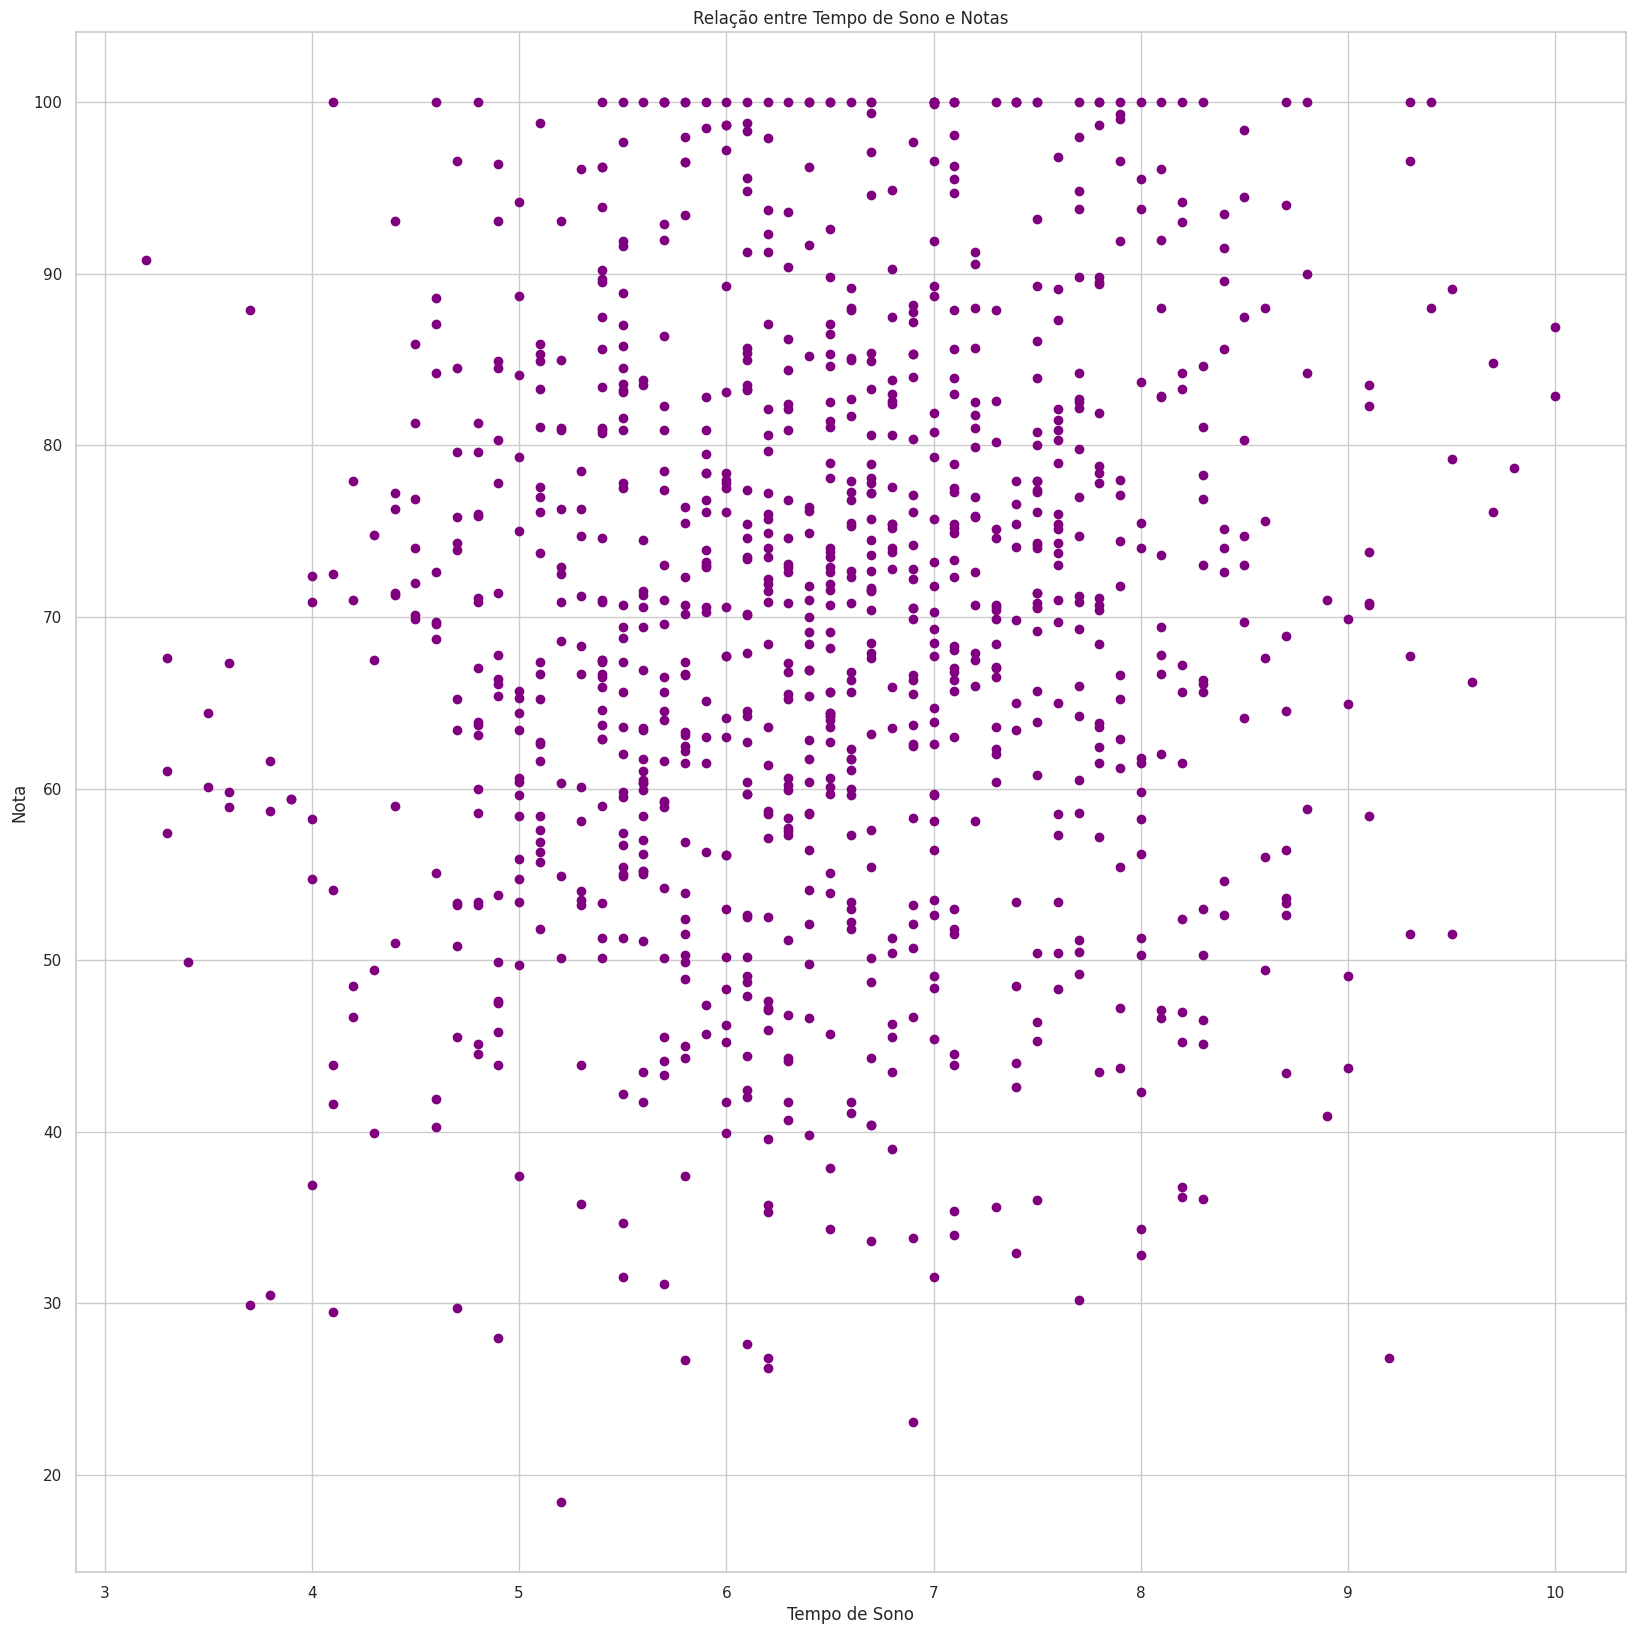

In [26]:
plot_score_by_study_hours(dataframe)
plot_score_by_attendance_percentage(dataframe)
plot_score_by_social_media_and_watch_time(dataframe)
plot_study_hours_by_free_time(dataframe)
plot_study_hours_by_internet_quality(dataframe)
plot_age_by_total_leisure_hours(dataframe)